### Calculando a Taxa de Retorno de um Ativo

#### Retorno Simples

In [2]:
# Importando as bibliotecas necessárias:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
# Importando os dados históricos do ativo da P&G:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')
PG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,7.875521
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,7.812392
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.701915
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,7.717696
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.686132
...,...,...,...,...,...,...
2022-09-06,137.940002,135.289993,135.880005,135.630005,8217200.0,135.630005
2022-09-07,137.759995,136.020004,136.029999,137.679993,6609400.0,137.679993
2022-09-08,138.490005,136.059998,137.009995,137.860001,7380500.0,137.860001


In [7]:
# Criando uma coluna com os retornos diários:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
# PG['simple_return'] - cria a coluna com os retornos
# PG['Adj Close'] - preço mais recente
# PG['Adj Close'].shift(1) - preço anterior

PG['simple_return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2022-09-06   -0.011155
2022-09-07    0.015115
2022-09-08    0.001307
2022-09-09    0.015233
2022-09-12    0.010646
Name: simple_return, Length: 6973, dtype: float64

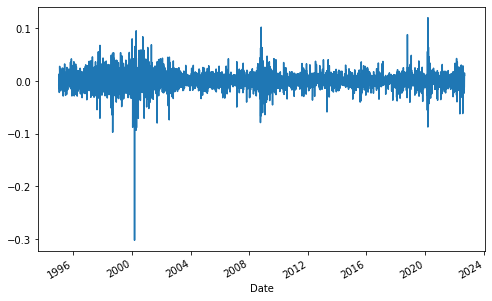

In [9]:
# Plotando um gráfico com os retornos:
PG['simple_return'].plot(figsize=(8,5)) # gera o gráfico
plt.show() # exibe o gráfico

In [11]:
# Calculando a Taxa Média de Retorno - retorno médio diário do período:
avg_returns_d = PG['simple_return'].mean()
# PG['simple_return'] - coluna do dataframe com retornos diários
# .mean() - calcula a média dos retornos
avg_returns_d

0.0005147191414457198

In [12]:
# Calculando a Taxa Média de Retorno Anual:
avg_returns_a = PG['simple_return'].mean()*250
# 250 - dias em que há negociação ao longo do ano
avg_returns_a

0.12867978536142996

In [14]:
# Imprimir Arredondado e com '%':
print(f'{avg_returns_a * 100:.2f}%')

12.87%


#### Retorno Logarítmo

In [15]:
# Criando uma coluna com os Retornos Logaritmos:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
# np.log - calcula o logaritmo do fechamento ajustado atual dividido pelo fechamento ajustado anterior

PG['log_return']

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2022-09-06   -0.011218
2022-09-07    0.015001
2022-09-08    0.001307
2022-09-09    0.015118
2022-09-12    0.010590
Name: log_return, Length: 6973, dtype: float64

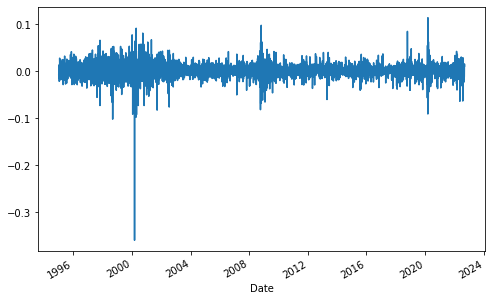

In [16]:
# Plota um gráfico com os Retornos Logaritmos:
PG['log_return'].plot(figsize=(8,5))
plt.show()

In [18]:
# Calcula o Retorno Logaritmo Medio Diario:
log_return_d = PG['log_return'].mean()
log_return_d

0.00041425515084351274

In [19]:
# Calcula o Retorno Logaritmo Medio Anual:
log_return_a = PG['log_return'].mean() * 250
log_return_a

0.10356378771087818

In [20]:
# Exibir o Retorno Logaritmo Medio Anual Arredondado e com '%':
print(f'{log_return_a * 100:.2f}%')

10.36%
